# Install Python Package
## numpy, pandas, matplotlib, seaborn

In [1]:
#!/usr/bin/python
#-*-coding: utf-8 -*-
#!pip install xgboost
#!pip install matplotlib
!pip install networkx
#!wget https://awards.opdc.go.th/awards_opdc/assets/fonts/THSarabunNew/THSarabunNew.ttf
#!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip#
#!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf
#!apt install fonts-thai-tlwg

Defaulting to user installation because normal site-packages is not writeable


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'c:\program files\python37\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({
    #'mathtext.fontset': 'cm',
    'font.family': 'cmr10'
})
import seaborn as sns
import networkx as nx
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine
from matplotlib import font_manager as fm, rcParams
from matplotlib.pyplot import figure, text
%matplotlib inline
%config InlineBackend.figure_format = 'retina' #2x
#import datetime as dt
#import xgboost as xgb
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTE
#from xgboost import plot_importance
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confustion_matrix
#from sklearn.feature_extraction.text import CountVectorizer

#Set font
#font_list = fm.createFontList(['THSarabunChula-Regular.ttf'])
#print(font_list)
#fm.fontManager.ttflist.extend(font_list)
#fm.fontManager.addfont(font_list)
#plt.rcParams['font.family'] = 'TH Sarabun Chula'
#plt.rcParams['xtick.labelsize'] = 20.0
#plt.rcParams['ytick.labelsize'] = 20.0

# Check all data

In [3]:
df=pd.read_csv('https://github.com/Surawich2021/Surawich-6310422083/raw/main/Homework07%20-%20Product%20Recomendation/CustomerPreferenceSurvey.csv')
df[0:46] #Check all data

ประทับเวลา  จักรยานเสือภูเขา  คอลลาเจน  Brownie อวกาศ  แม่โขง  Botox  \
0   3/20/2021 11:53                 0         0              0       0      0   
1   3/20/2021 11:54                 0         1              0       1      0   
2   3/20/2021 11:54                 1         0              0       0      0   
3   3/20/2021 11:54                 0         0              0       1      0   
4   3/20/2021 11:54                 0         1              0       0      1   
5   3/20/2021 11:54                 1         1              0       0      0   
6   3/20/2021 11:54                 0         0              0       1      0   
7   3/20/2021 11:54                 0         0              0       0      0   
8   3/20/2021 11:54                 0         0              0       0      0   
9   3/20/2021 11:54                 0         1              0       0      0   
10  3/20/2021 11:54                 1         0              0       0      0   
11  3/20/2021 11:54                 0         0              0       1      0   
12  3/20/2021 11:55                 1         1              0       0      0   
13  3/20/2021 11:55                 0         0              0       0      0   
14  3/20/2021 11:55                 0         1              0       0      0   
15  3/20/2021 11:55                 1         1              0       0      0   
16  3/20/2021 11:55                 1         1              0       0      0   
17  3/20/2021 11:55                 1         0              0       0      0   
18  3/20/2021 11:55                 0         0              0       1      0   
19  3/20/2021 11:55                 0         1              0       0      1   
20  3/20/2021 11:55                 0         0              0       0      0   
21  3/20/2021 11:55                 1         1              1       1      1   
22  3/20/2021 11:56                 0         1              1       0      1   
23  3/20/2021 11:56                 1         1              0       0      0   
24  3/20/2021 11:56                 0         0              0       0      0   
25  3/20/2021 11:57                 0         0              0       0      0   
26  3/20/2021 11:57                 0         0              0       0      0   
27  3/20/2021 11:57                 1         1              0       1      1   
28  3/20/2021 11:59                 0         1              0       0      0   
29  3/20/2021 11:59                 1         0              1       1      1   
30  3/20/2021 12:00                 0         0              0       0      0   
31  3/20/2021 12:01                 1         1              0       0      1   
32  3/20/2021 12:01                 0         1              0       0      1   
33  3/20/2021 12:02                 0         0              0       0      0   
34  3/20/2021 12:02                 0         1              0       0      0   
35  3/20/2021 12:02                 1         1              0       0      1   
36  3/20/2021 12:02                 0         1              0       0      0   
37  3/20/2021 12:02                 0         1              0       0      0   
38  3/20/2021 12:02                 1         1              1       1      0   
39  3/20/2021 12:03                 1         1              0       1      0   
40  3/20/2021 12:03                 0         0              0       1      0   
41  3/20/2021 12:03                 0         1              0       1      0   
42  3/20/2021 12:03                 1         0              0       1      0   
43  3/20/2021 12:04                 0         0              1       1      0   
44   4/5/2021 16:13                 0         1              0       0      0   
45  4/16/2021 16:29                 0         1              0       0      0   

    กัญชา  กัญชง  เครื่องวัดความดัน  หลอดไฟเปลี่ยนสีได้  ...  มะม่วงเบา  \
0       0      0                  0                   0  ...          0   
1       0      0                  1                

In [4]:
#check statistics of each product
df.describe()

จักรยานเสือภูเขา   คอลลาเจน  Brownie อวกาศ     แม่โขง      Botox  \
count         46.000000  46.000000      46.000000  46.000000  46.000000   
mean           0.347826   0.543478       0.108696   0.304348   0.195652   
std            0.481543   0.503610       0.314696   0.465215   0.401085   
min            0.000000   0.000000       0.000000   0.000000   0.000000   
25%            0.000000   0.000000       0.000000   0.000000   0.000000   
50%            0.000000   1.000000       0.000000   0.000000   0.000000   
75%            1.000000   1.000000       0.000000   1.000000   0.000000   
max            1.000000   1.000000       1.000000   1.000000   1.000000   

           กัญชา      กัญชง  เครื่องวัดความดัน  หลอดไฟเปลี่ยนสีได้  \
count  46.000000  46.000000          46.000000           46.000000   
mean    0.173913   0.086957           0.413043            0.239130   
std     0.383223   0.284885           0.497821            0.431266   
min     0.000000   0.000000           0.000000            0.000000   
25%     0.000000   0.000000           0.000000            0.000000   
50%     0.000000   0.000000           0.000000            0.000000   
75%     0.000000   0.000000           1.000000            0.000000   
max     1.000000   1.000000           1.000000            1.000000   

       คอร์ส bikini wax  ...  มะม่วงเบา  ห้องน้ำแมวอัตโนมัติ  กระเป๋า_chanel  \
count         46.000000  ...  46.000000            46.000000       46.000000   
mean           0.086957  ...   0.391304             0.065217        0.108696   
std            0.284885  ...   0.493435             0.249637        0.314696   
min            0.000000  ...   0.000000             0.000000        0.000000   
25%            0.000000  ...   0.000000             0.000000        0.000000   
50%            0.000000  ...   0.000000             0.000000        0.000000   
75%            0.000000  ...   1.000000             0.000000        0.000000   
max            1.000000  ...   1.000000             1.000000        1.000000   

       ข้าวขาหมูคากิคาจักออนไลน์   ถั่งเช่า  หมอนสุขภาพสำหรับคนนอนไม่หลับ  \
count                  46.000000  46.000000                     46.000000   
mean                    0.130435   0.173913                      0.391304   
std                     0.340503   0.383223                      0.493435   
min                     0.000000   0.000000                      0.000000   
25%                     0.000000   0.000000                      0.000000   
50%                     0.000000   0.000000                      0.000000   
75%                     0.000000   0.000000                      1.000000   
max                     1.000000   1.000000                      1.000000   

       อาหารแมวคลีนเพื่อสุขภาพลดหุ่น  น้ำส้มดีโด้  Software ถูกลิขสิทธิ์  \
count                      46.000000    46.000000              46.000000   
mean                        0.086957     0.652174               0.782609   
std                         0.284885     0.481543               0.417029   
min                         0.000000     0.000000               0.000000   
25%                         0.000000     0.000000               1.000000   
50%                         0.000000     1.000000               1.000000   
75%                         0.000000     1.000000               1.000000   
max                         1.000000     1.000000               1.000000   

       ครีมกันแดด  
count        46.0  
mean          1.0  
std           0.0  
min           1.0  
25%           1.0  
50%           1.0  
75%           1.0  
max           1.0  

[8 rows x 60 columns]

In [5]:
#Sort the most favorite products 
df2 = df.describe().T.sort_values('mean', ascending=False)
print(df2.head(10))
print('*'*100)
df3 = df.describe().T.sort_values('mean', ascending=False)
print(df3.tail(10))

                       count      mean       std  min  25%  50%  75%  max
ครีมกันแดด              46.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
กระเป๋า                 46.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
ชาบู                    46.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
โรตี                    46.0  0.956522  0.206185  0.0  1.0  1.0  1.0  1.0
กะหรี่(ปั๊บ)            46.0  0.934783  0.249637  0.0  1.0  1.0  1.0  1.0
เม็ดมะม่วงหิมพานต์      46.0  0.913043  0.284885  0.0  1.0  1.0  1.0  1.0
หมอนข้าง                46.0  0.869565  0.340503  0.0  1.0  1.0  1.0  1.0
หมูแดดเดียว             46.0  0.826087  0.383223  0.0  1.0  1.0  1.0  1.0
แฟน ที่แปลว่าพัดลม      46.0  0.804348  0.401085  0.0  1.0  1.0  1.0  1.0
Software ถูกลิขสิทธิ์   46.0  0.782609  0.417029  0.0  1.0  1.0  1.0  1.0
****************************************************************************************************
                               count      mean       std  min  25%  50%  75%  \
คอร์ส

In [6]:
df2['mean']
top10 = df2['mean'].head(10)
print(top10)

ครีมกันแดด               1.000000
กระเป๋า                  1.000000
ชาบู                     1.000000
โรตี                     0.956522
กะหรี่(ปั๊บ)             0.934783
เม็ดมะม่วงหิมพานต์       0.913043
หมอนข้าง                 0.869565
หมูแดดเดียว              0.826087
แฟน ที่แปลว่าพัดลม       0.804348
Software ถูกลิขสิทธิ์    0.782609
Name: mean, dtype: float64


Text(0.5, 1.0, 'Top10 most favorite product')

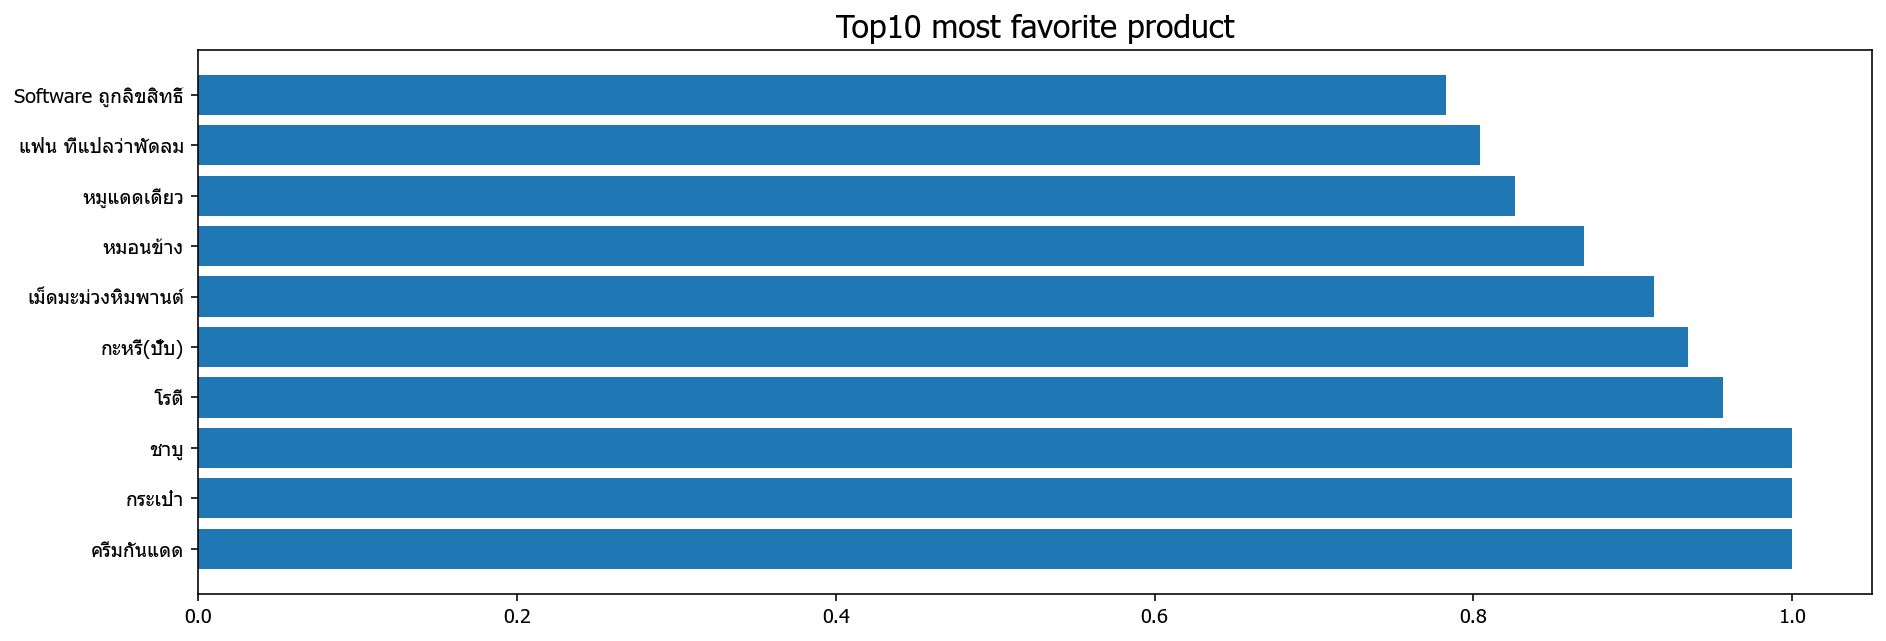

In [18]:
plt.figure(figsize=(15,5))
plt.rc('font',family="Tahoma")
Items_name = ['ครีมกันแดด','กระเป๋า','ชาบู','โรตี','กะหรี่(ปั๊บ)','เม็ดมะม่วงหิมพานต์','หมอนข้าง','หมูแดดเดียว','แฟน ที่แปลว่าพัดลม','Software ถูกลิขสิทธิ์']
ax = plt.axes()
ax.barh(Items_name,top10)
ax.set_title('Top10 most favorite product',fontname='Tahoma',fontsize='16')
#top10.sort_values().plot(kind='barh');

In [8]:
df3['mean']
last10 = df3['mean'].tail(10)
print(last10)

คอร์สโบท็อกกราม                  0.108696
กระเป๋า_chanel                   0.108696
Brownie อวกาศ                    0.108696
คอร์ส bikini wax                 0.086957
กัญชง                            0.086957
อาหารแมวคลีนเพื่อสุขภาพลดหุ่น    0.086957
Surfskate                        0.065217
ห้องน้ำแมวอัตโนมัติ              0.065217
เครื่องย่อยเศษอาหาร              0.043478
PS5                              0.043478
Name: mean, dtype: float64


Text(0.5, 1.0, 'Last10 most favorite product')

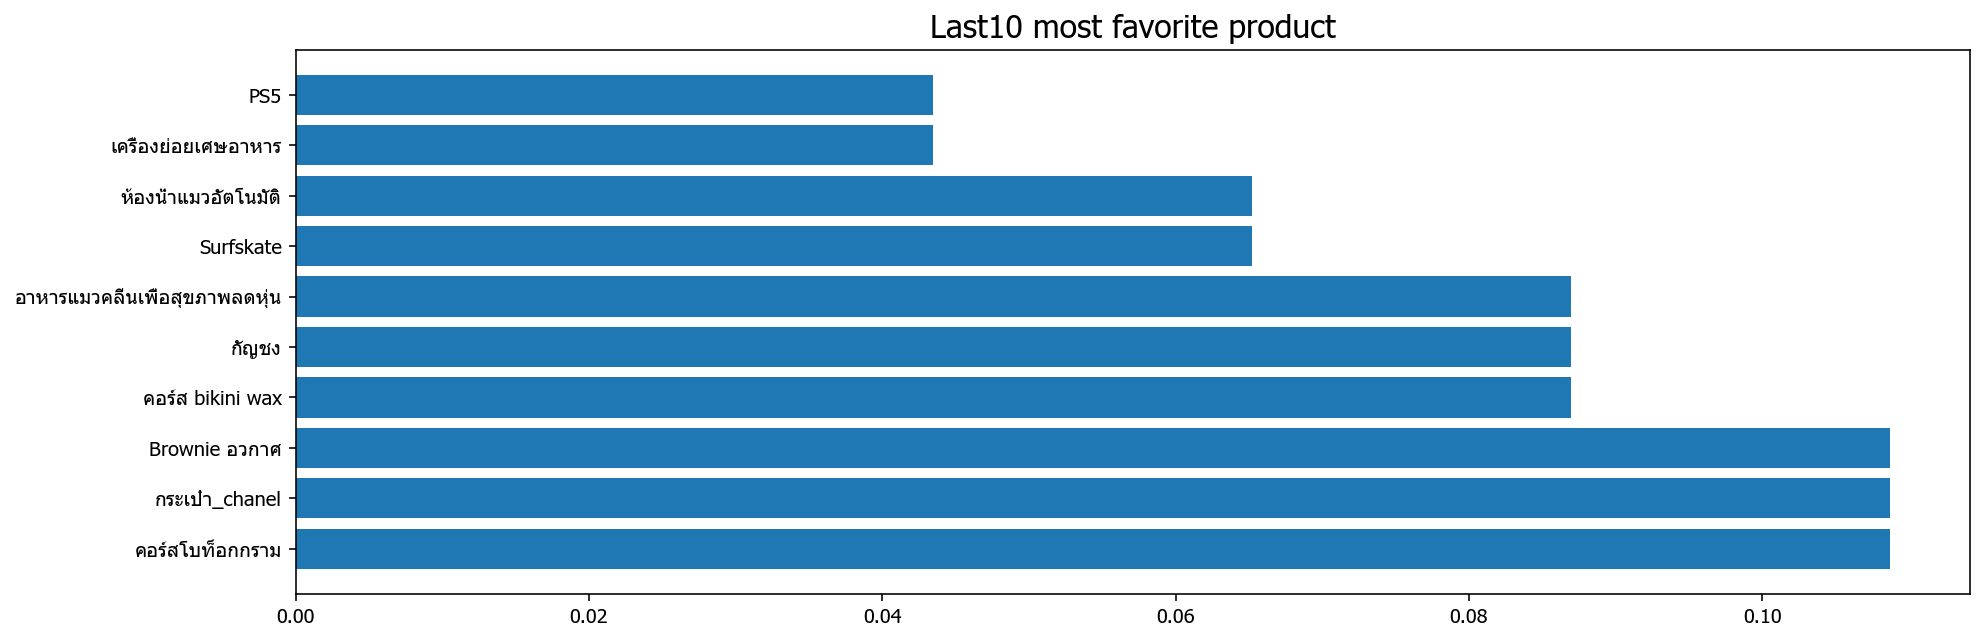

In [19]:
plt.figure(figsize=(15,5))
plt.rc('font',family="Tahoma")
Items_name = ['คอร์สโบท็อกกราม','กระเป๋า_chanel','Brownie อวกาศ','คอร์ส bikini wax','กัญชง','อาหารแมวคลีนเพื่อสุขภาพลดหุ่น','Surfskate','ห้องน้ำแมวอัตโนมัติ','เครื่องย่อยเศษอาหาร','PS5']
ax = plt.axes()
ax.barh(Items_name,last10)
ax.set_title('Last10 most favorite product',fontname='Tahoma',fontsize='16')
#top10.sort_values().plot(kind='barh');
#last10.sort_values().plot(kind='barh');

In [20]:
df.corr() # Correlation

จักรยานเสือภูเขา  คอลลาเจน  Brownie อวกาศ  \
จักรยานเสือภูเขา                         1.000000  0.211157       0.184897   
คอลลาเจน                                 0.211157  1.000000       0.039627   
Brownie อวกาศ                            0.184897  0.039627       1.000000   
แม่โขง                                   0.112136 -0.152585       0.376174   
Botox                                    0.215108  0.342006       0.355946   
กัญชา                                    0.026178 -0.270338       0.576831   
กัญชง                                    0.098601 -0.026937       0.635844   
เครื่องวัดความดัน                        0.128974 -0.028904      -0.151099   
หลอดไฟเปลี่ยนสีได้                       0.232621  0.002224      -0.032036   
คอร์ส bikini wax                        -0.063387  0.282843       0.140101   
เก้าอี้นวดไฟฟ้า                         -0.147314 -0.163396       0.279518   
ต้นไม้ประดับห้อง                         0.052889  0.103249       0.219183   
หมอนข้าง                                 0.147314 -0.095784      -0.072134   
ตาชั่ง                                   0.215900  0.014167       0.093928   
คอร์สโบท็อกกราม                          0.038255  0.320061       0.102439   
แสงโสม                                   0.041667 -0.247014       0.184897   
กะหรี่(ปั๊บ)                            -0.176822  0.111435       0.092240   
Lego                                     0.275461  0.292876       0.267374   
แฟน ที่แปลว่าพัดลม                       0.015008 -0.121974       0.172232   
ยาดอง                                   -0.122023  0.047535       0.110648   
ชุดนอนไม่ได้นอน                         -0.055249  0.145279       0.046498   
ที่ยกน้ำหนัก (Dumbell)                   0.398493  0.248837       0.136886   
เครื่องดูดฝุ่นอัตโนมัติ (robot)          0.211157  0.123810       0.179844   
เนื้อวากิล                               0.118533 -0.172033       0.242917   
หมูแดดเดียว                             -0.267019 -0.190238      -0.024035   
drone                                    0.123744  0.095784       0.279518   
เครื่องย่อยเศษอาหาร                      0.291937  0.195402       0.268031   
เสื้อซีทรู                               0.125615  0.411492      -0.032036   
ไพ่ยิปซี                                 0.018610  0.206858       0.131703   
เนื้อย่าง                                0.154258 -0.090607       0.064069   
เครื่องทำลายเอกสาร                       0.325972  0.145279       0.046498   
กระเป๋า                                       NaN       NaN            NaN   
ชาบู                                          NaN       NaN            NaN   
Surfskate                                0.361682  0.065324       0.190629   
Board game                              -0.102784 -0.249632      -0.022019   
ชุดน้องหมา                               0.041667  0.302791      -0.108388   
Omakase                                  0.168394 -0.046004       0.323932   
เม็ดมะม่วงหิมพานต์                      -0.098601  0.026937       0.107770   
ไฟอัจฉริยะ                               0.368300  0.078933       0.204050   
บัตตาเลี่ยนที่ตัดผม                      0.026178  0.075094       0.208300   
ไดร์เป่าผม Dyson                         0.184897  0.179844       0.102439   
แผ่นเสียง                                0.215108  0.011958       0.532005   
กรรไกรตัดขนจมูก                          0.256174  0.108866       0.006222   
PS5                                      0.068119 -0.018610       0.268031   
เครื่องตรวจ_น้ำตาล_ในเลือด               0.279053  0.165616       0.154604   
โรตี                                     0.155700  0.232621       0.074453   
กะปิดอง                                  0.215108  0.231990       0.179887   
น้องหมา                                  0.168394  0.271426      -0.014724   
แพ็คเกจไทยเที่ยวไทย                     -0.059591  0.091168       0.085107   
เกมส์ FIFA Online                       -0.147314 -0.033806       0.279518   
มะม่วงเบา                                0.162650  0.19

In [21]:
df.cov() # Covariance

จักรยานเสือภูเขา  คอลลาเจน  Brownie อวกาศ  \
จักรยานเสือภูเขา                         0.231884  0.051208       0.028019   
คอลลาเจน                                 0.051208  0.253623       0.006280   
Brownie อวกาศ                            0.028019  0.006280       0.099034   
แม่โขง                                   0.025121 -0.035749       0.055072   
Botox                                    0.041546  0.069082       0.044928   
กัญชา                                    0.004831 -0.052174       0.069565   
กัญชง                                    0.013527 -0.003865       0.057005   
เครื่องวัดความดัน                        0.030918 -0.007246      -0.023671   
หลอดไฟเปลี่ยนสีได้                       0.048309  0.000483      -0.004348   
คอร์ส bikini wax                        -0.008696  0.040580       0.012560   
เก้าอี้นวดไฟฟ้า                         -0.024155 -0.028019       0.029952   
ต้นไม้ประดับห้อง                         0.011594  0.023671       0.031401   
หมอนข้าง                                 0.024155 -0.016425      -0.007729   
ตาชั่ง                                   0.049275  0.003382       0.014010   
คอร์สโบท็อกกราม                          0.005797  0.050725       0.010145   
แสงโสม                                   0.009662 -0.059903       0.028019   
กะหรี่(ปั๊บ)                            -0.021256  0.014010       0.007246   
Lego                                     0.064734  0.071981       0.041063   
แฟน ที่แปลว่าพัดลม                       0.002899 -0.024638       0.021739   
ยาดอง                                   -0.026087  0.010628       0.015459   
ชุดนอนไม่ได้นอน                         -0.009662  0.026570       0.005314   
ที่ยกน้ำหนัก (Dumbell)                   0.094686  0.061836       0.021256   
เครื่องดูดฝุ่นอัตโนมัติ (robot)          0.051208  0.031401       0.028502   
เนื้อวากิล                               0.027053 -0.041063       0.036232   
หมูแดดเดียว                             -0.049275 -0.036715      -0.002899   
drone                                    0.020290  0.016425       0.029952   
เครื่องย่อยเศษอาหาร                      0.028986  0.020290       0.017391   
เสื้อซีทรู                               0.026087  0.089372      -0.004348   
ไพ่ยิปซี                                 0.003865  0.044928       0.017874   
เนื้อย่าง                                0.033816 -0.020773       0.009179   
เครื่องทำลายเอกสาร                       0.057005  0.026570       0.005314   
กระเป๋า                                  0.000000  0.000000       0.000000   
ชาบู                                     0.000000  0.000000       0.000000   
Surfskate                                0.043478  0.008213       0.014976   
Board game                              -0.024155 -0.061353      -0.003382   
ชุดน้องหมา                               0.009662  0.073430      -0.016425   
Omakase                                  0.033816 -0.009662       0.042512   
เม็ดมะม่วงหิมพานต์                      -0.013527  0.003865       0.009662   
ไฟอัจฉริยะ                               0.084058  0.018841       0.030435   
บัตตาเลี่ยนที่ตัดผม                      0.004831  0.014493       0.025121   
ไดร์เป่าผม Dyson                         0.028019  0.028502       0.010145   
แผ่นเสียง                                0.041546  0.002415       0.067150   
กรรไกรตัดขนจมูก                          0.060870  0.027053       0.000966   
PS5                                      0.006763 -0.001932       0.017391   
เครื่องตรวจ_น้ำตาล_ในเลือด               0.056039  0.034783       0.020290   
โรตี                                     0.015459  0.024155       0.004831   
กะปิดอง                                  0.041546  0.046860       0.022705   
น้องหมา                                  0.033816  0.057005      -0.001932   
แพ็คเกจไทยเที่ยวไทย                     -0.014493  0.023188       0.013527   
เกมส์ FIFA Online                       -0.024155 -0.005797       0.029952   
มะม่วงเบา                                0.038647  0.04

In [22]:
import seaborn as sns
corr = df.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(150, 80))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True)

<AxesSubplot:>

# วิธีที่1 Cosine Similarity

In [23]:
#remove unnecessary column
df_adj=df.drop(columns='ประทับเวลา')
#print(df_adj)

In [24]:
new_matrix = pd.DataFrame(index=df_adj.columns,columns=df_adj.columns)
new_matrix.head(5)

จักรยานเสือภูเขา คอลลาเจน Brownie อวกาศ แม่โขง Botox กัญชา  \
จักรยานเสือภูเขา              NaN      NaN           NaN    NaN   NaN   NaN   
คอลลาเจน                      NaN      NaN           NaN    NaN   NaN   NaN   
Brownie อวกาศ                 NaN      NaN           NaN    NaN   NaN   NaN   
แม่โขง                        NaN      NaN           NaN    NaN   NaN   NaN   
Botox                         NaN      NaN           NaN    NaN   NaN   NaN   

                 กัญชง เครื่องวัดความดัน หลอดไฟเปลี่ยนสีได้ คอร์ส bikini wax  \
จักรยานเสือภูเขา   NaN               NaN                NaN              NaN   
คอลลาเจน           NaN               NaN                NaN              NaN   
Brownie อวกาศ      NaN               NaN                NaN              NaN   
แม่โขง             NaN               NaN                NaN              NaN   
Botox              NaN               NaN                NaN              NaN   

                  ... มะม่วงเบา ห้องน้ำแมวอัตโนมัติ กระเป๋า_chanel  \
จักรยานเสือภูเขา  ...       NaN                 NaN            NaN   
คอลลาเจน          ...       NaN                 NaN            NaN   
Brownie อวกาศ     ...       NaN                 NaN            NaN   
แม่โขง            ...       NaN                 NaN            NaN   
Botox             ...       NaN                 NaN            NaN   

                 ข้าวขาหมูคากิคาจักออนไลน์ ถั่งเช่า  \
จักรยานเสือภูเขา                       NaN      NaN   
คอลลาเจน                               NaN      NaN   
Brownie อวกาศ                          NaN      NaN   
แม่โขง                                 NaN      NaN   
Botox                                  NaN      NaN   

                 หมอนสุขภาพสำหรับคนนอนไม่หลับ อาหารแมวคลีนเพื่อสุขภาพลดหุ่น  \
จักรยานเสือภูเขา                          NaN                           NaN   
คอลลาเจน                                  NaN                           NaN   
Brownie อวกาศ                             NaN                           NaN   
แม่โขง                                    NaN                           NaN   
Botox                                     NaN                           NaN   

                 น้ำส้มดีโด้ Software ถูกลิขสิทธิ์ ครีมกันแดด  
จักรยานเสือภูเขา         NaN                   NaN        NaN  
คอลลาเจน                 NaN                   NaN        NaN  
Brownie อวกาศ            NaN                   NaN        NaN  
แม่โขง                   NaN                   NaN        NaN  
Botox                    NaN                   NaN        NaN  

[5 rows x 60 columns]

In [25]:
for i in range(0,len(new_matrix.columns)) :
# Loop through the columns for each column
    for j in range(0,len(new_matrix.columns)) :
    # Fill in placeholder with cosine similarities
        new_matrix.iloc[i,j] = 1-cosine(df_adj.iloc[:,i],df_adj.iloc[:,j])

In [26]:
new_matrix.head(60)

จักรยานเสือภูเขา  คอลลาเจน Brownie อวกาศ  \
จักรยานเสือภูเขา                             1.0      0.55       0.33541   
คอลลาเจน                                    0.55       1.0      0.268328   
Brownie อวกาศ                            0.33541  0.268328           1.0   
แม่โขง                                  0.400892  0.320713      0.478091   
Botox                                   0.416667  0.533333      0.447214   
กัญชา                                   0.265165  0.141421      0.632456   
กัญชง                                       0.25       0.2       0.67082   
เครื่องวัดความดัน                       0.458831  0.458831      0.102598   
หลอดไฟเปลี่ยนสีได้                      0.452267  0.361814       0.13484   
คอร์ส bikini wax                           0.125       0.4      0.223607   
เก้าอี้นวดไฟฟ้า                         0.102062  0.163299      0.365148   
ต้นไม้ประดับห้อง                        0.522233  0.661495      0.389249   
หมอนข้าง                                0.592927  0.664078      0.282843   
ตาชั่ง                                  0.583717  0.610658      0.321288   
คอร์สโบท็อกกราม                         0.223607  0.447214           0.2   
แสงโสม                                     0.375       0.3       0.33541   
กะหรี่(ปั๊บ)                            0.533745  0.731993      0.340997   
Lego                                     0.60351  0.705642      0.415227   
แฟน ที่แปลว่าพัดลม                      0.534297  0.624716      0.367607   
ยาดอง                                   0.216506  0.404145      0.258199   
ชุดนอนไม่ได้นอน                         0.188982  0.377964      0.169031   
ที่ยกน้ำหนัก (Dumbell)                  0.661438  0.680336      0.338062   
เครื่องดูดฝุ่นอัตโนมัติ (robot)             0.55       0.6      0.357771   
เนื้อวากิล                              0.538816  0.538816       0.40161   
หมูแดดเดียว                             0.446109  0.616441      0.290191   
drone                                   0.306186  0.326599      0.365148   
เครื่องย่อยเศษอาหาร                     0.353553  0.282843      0.316228   
เสื้อซีทรู                              0.376889  0.603023       0.13484   
ไพ่ยิปซี                                0.301511  0.482418       0.26968   
เนื้อย่าง                               0.565752  0.591864        0.3114   
เครื่องทำลายเอกสาร                      0.472456  0.377964      0.169031   
กระเป๋า                                 0.589768   0.73721       0.32969   
ชาบู                                    0.589768   0.73721       0.32969   
Surfskate                               0.433013   0.23094      0.258199   
Board game                              0.417815  0.482808      0.249136   
ชุดน้องหมา                                 0.375       0.6      0.111803   
Omakase                                 0.395285  0.316228      0.424264   
เม็ดมะม่วงหิมพานต์                      0.540062  0.709795      0.345033   
ไฟอัจฉริยะ                              0.580948  0.464758       0.34641   
บัตตาเลี่ยนที่ตัดผม                     0.265165  0.353553      0.316228   
ไดร์เป่าผม Dyson                         0.33541  0.357771           0.2   
แผ่นเสียง                               0.416667  0.333333      0.596285   
กรรไกรตัดขนจมูก                          0.53033  0.518545      0.210819   
PS5                                     0.176777  0.141421      0.316228   
เครื่องตรวจ_น้ำตาล_ในเลือด              0.474342  0.442719      0.282843   
โรตี                                    0.603023  0.753778        0.3371   
กะปิดอง                                 0.416667  0.466667      0.298142   
น้องหมา                                 0.395285  0.505964      0.141421   
แพ็คเกจไทยเที่ยวไทย                     0.373101  0.554322      0.286039   
เกมส์ FIFA Online                       0.102062  0.244949      0.365148   
มะม่วงเบา                               0.471405  0.565685      0.210819   
ห้องน้ำแมวอัตโนมัติ                     0.433013   0.34641      0.516398   
กระเ

In [27]:
df_rank = pd.DataFrame(index=new_matrix.columns,columns=range(1,11))
for i in range(0,len(new_matrix)):
    df_rank.iloc[i, :10]=new_matrix.iloc[0:,i].sort_values(ascending=False)[:10].index
    
df_rank.head(10)

1                           2   \
จักรยานเสือภูเขา      จักรยานเสือภูเขา      ที่ยกน้ำหนัก (Dumbell)   
คอลลาเจน                      คอลลาเจน                        โรตี   
Brownie อวกาศ            Brownie อวกาศ              กระเป๋า_chanel   
แม่โขง                          แม่โขง                      แสงโสม   
Botox                            Botox             คอร์สโบท็อกกราม   
กัญชา                            กัญชา               Brownie อวกาศ   
กัญชง                            กัญชง               Brownie อวกาศ   
เครื่องวัดความดัน    เครื่องวัดความดัน                    หมอนข้าง   
หลอดไฟเปลี่ยนสีได้  หลอดไฟเปลี่ยนสีได้                  ไฟอัจฉริยะ   
คอร์ส bikini wax      คอร์ส bikini wax  เครื่องตรวจ_น้ำตาล_ในเลือด   

                                       3                             4   \
จักรยานเสือภูเขา                     Lego                          โรตี   
คอลลาเจน                       ครีมกันแดด                       กระเป๋า   
Brownie อวกาศ                       กัญชง                         กัญชา   
แม่โขง                 เม็ดมะม่วงหิมพานต์                    เนื้อวากิล   
Botox                      กระเป๋า_chanel                      คอลลาเจน   
กัญชา                              แม่โขง                         กัญชง   
กัญชง                           แผ่นเสียง                         กัญชา   
เครื่องวัดความดัน                 กระเป๋า                          ชาบู   
หลอดไฟเปลี่ยนสีได้  Software ถูกลิขสิทธิ์                          โรตี   
คอร์ส bikini wax          กรรไกรตัดขนจมูก  หมอนสุขภาพสำหรับคนนอนไม่หลับ   

                                        5                          6   \
จักรยานเสือภูเขา                  หมอนข้าง                       ชาบู   
คอลลาเจน                              ชาบู               กะหรี่(ปั๊บ)   
Brownie อวกาศ                    แผ่นเสียง  ข้าวขาหมูคากิคาจักออนไลน์   
แม่โขง                        กะหรี่(ปั๊บ)                      กัญชา   
Botox               ที่ยกน้ำหนัก (Dumbell)      Software ถูกลิขสิทธิ์   
กัญชา                               แสงโสม           ต้นไม้ประดับห้อง   
กัญชง                       กระเป๋า_chanel            เก้าอี้นวดไฟฟ้า   
เครื่องวัดความดัน               ครีมกันแดด                       โรตี   
หลอดไฟเปลี่ยนสีได้      แฟน ที่แปลว่าพัดลม                น้ำส้มดีโด้   
คอร์ส bikini wax                เสื้อซีทรู           ไดร์เป่าผม Dyson   

                                           7                   8   \
จักรยานเสือภูเขา                      กระเป๋า          ครีมกันแดด   
คอลลาเจน                   เม็ดมะม่วงหิมพานต์                Lego   
Brownie อวกาศ             ห้องน้ำแมวอัตโนมัติ              แม่โขง   
แม่โขง                        กรรไกรตัดขนจมูก                โรตี   
Botox                      แฟน ที่แปลว่าพัดลม                โรตี   
กัญชา                          กระเป๋า_chanel           แผ่นเสียง   
กัญชง               ข้าวขาหมูคากิคาจักออนไลน์              แม่โขง   
เครื่องวัดความดัน                     ตาชั่ง   เม็ดมะม่วงหิมพานต์   
หลอดไฟเปลี่ยนสีได้                 ครีมกันแดด                ชาบู   
คอร์ส bikini wax    ข้าวขาหมูคากิคาจักออนไลน์   เกมส์ FIFA Online   

                                       9                              10  
จักรยานเสือภูเขา                  ตาชั่ง           Software ถูกลิขสิทธิ์  
คอลลาเจน            Software ถูกลิขสิทธิ์         ที่ยกน้ำหนัก (Dumbell)  
Brownie อวกาศ                       Botox  อาหารแมวคลีนเพื่อสุขภาพลดหุ่น  
แม่โขง                        หมูแดดเดียว               ต้นไม้ประดับห้อง  
Botox                       Brownie อวกาศ                     ครีมกันแดด  
กัญชา                  แฟน ที่แปลว่าพัดลม                        Omakase  
กัญชง                                Lego                     เนื้อวากิล  
เครื่องวัดความดัน        ต้นไม้ประดับห้อง                      เนื้อย่าง  
หลอดไฟเปลี่ยนสีได้                กระเป๋า                        ตาชั่ง   
คอร์ส bikini wax                 คอลลาเจน                     ไฟอัจฉริยะ

In [28]:
df_rank.head(10).iloc[:10,1:5]

2                      3  \
จักรยานเสือภูเขา        ที่ยกน้ำหนัก (Dumbell)                   Lego   
คอลลาเจน                                  โรตี             ครีมกันแดด   
Brownie อวกาศ                   กระเป๋า_chanel                  กัญชง   
แม่โขง                                  แสงโสม     เม็ดมะม่วงหิมพานต์   
Botox                          คอร์สโบท็อกกราม         กระเป๋า_chanel   
กัญชา                            Brownie อวกาศ                 แม่โขง   
กัญชง                            Brownie อวกาศ              แผ่นเสียง   
เครื่องวัดความดัน                     หมอนข้าง                กระเป๋า   
หลอดไฟเปลี่ยนสีได้                  ไฟอัจฉริยะ  Software ถูกลิขสิทธิ์   
คอร์ส bikini wax    เครื่องตรวจ_น้ำตาล_ในเลือด        กรรไกรตัดขนจมูก   

                                               4                       5  
จักรยานเสือภูเขา                            โรตี                หมอนข้าง  
คอลลาเจน                                 กระเป๋า                    ชาบู  
Brownie อวกาศ                              กัญชา               แผ่นเสียง  
แม่โขง                                เนื้อวากิล            กะหรี่(ปั๊บ)  
Botox                                   คอลลาเจน  ที่ยกน้ำหนัก (Dumbell)  
กัญชา                                      กัญชง                  แสงโสม  
กัญชง                                      กัญชา          กระเป๋า_chanel  
เครื่องวัดความดัน                           ชาบู              ครีมกันแดด  
หลอดไฟเปลี่ยนสีได้                          โรตี      แฟน ที่แปลว่าพัดลม  
คอร์ส bikini wax    หมอนสุขภาพสำหรับคนนอนไม่หลับ              เสื้อซีทรู

# วิธีที่2 Collaborative filtering (Item-based)

In [29]:
item_item_matrix = pd.DataFrame(index=df.columns,columns=df.columns)
item_item_matrix1 = item_item_matrix.iloc[2:-1,2:-1]

In [30]:
for i in range(0,len(item_item_matrix1.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix1.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix1.iloc[i,j] =  1-cosine(df_adj.iloc[:,i],df_adj.iloc[:,j])

In [31]:
item_item_matrix1.head(10)

คอลลาเจน Brownie อวกาศ    แม่โขง     Botox     กัญชา  \
คอลลาเจน                 1.0          0.55   0.33541  0.400892  0.416667   
Brownie อวกาศ           0.55           1.0  0.268328  0.320713  0.533333   
แม่โขง               0.33541      0.268328       1.0  0.478091  0.447214   
Botox               0.400892      0.320713  0.478091       1.0  0.267261   
กัญชา               0.416667      0.533333  0.447214  0.267261       1.0   
กัญชง               0.265165      0.141421  0.632456  0.566947  0.235702   
เครื่องวัดความดัน       0.25           0.2   0.67082  0.400892  0.333333   
หลอดไฟเปลี่ยนสีได้  0.458831      0.458831  0.102598  0.367884  0.229416   
คอร์ส bikini wax    0.452267      0.361814   0.13484  0.241747  0.301511   
เก้าอี้นวดไฟฟ้า        0.125           0.4  0.223607  0.133631  0.166667   

                       กัญชง เครื่องวัดความดัน หลอดไฟเปลี่ยนสีได้  \
คอลลาเจน            0.265165              0.25           0.458831   
Brownie อวกาศ       0.141421               0.2           0.458831   
แม่โขง              0.632456           0.67082           0.102598   
Botox               0.566947          0.400892           0.367884   
กัญชา               0.235702          0.333333           0.229416   
กัญชง                    1.0           0.53033           0.324443   
เครื่องวัดความดัน    0.53033               1.0           0.114708   
หลอดไฟเปลี่ยนสีได้  0.324443          0.114708                1.0   
คอร์ส bikini wax         0.0          0.150756           0.415029   
เก้าอี้นวดไฟฟ้า          0.0               0.0           0.114708   

                   คอร์ส bikini wax เก้าอี้นวดไฟฟ้า  ... เกมส์ FIFA Online  \
คอลลาเจน                   0.452267           0.125  ...          0.373101   
Brownie อวกาศ              0.361814             0.4  ...          0.554322   
แม่โขง                      0.13484        0.223607  ...          0.286039   
Botox                      0.241747        0.133631  ...          0.341882   
กัญชา                      0.301511        0.166667  ...          0.426401   
กัญชง                           0.0             0.0  ...          0.226134   
เครื่องวัดความดัน          0.150756             0.0  ...            0.1066   
หลอดไฟเปลี่ยนสีได้         0.415029        0.114708  ...           0.29347   
คอร์ส bikini wax                1.0        0.301511  ...           0.25713   
เก้าอี้นวดไฟฟ้า            0.301511             1.0  ...          0.319801   

                   มะม่วงเบา ห้องน้ำแมวอัตโนมัติ กระเป๋า_chanel  \
คอลลาเจน            0.102062            0.471405       0.433013   
Brownie อวกาศ       0.244949            0.565685        0.34641   
แม่โขง              0.365148            0.210819       0.516398   
Botox               0.327327            0.377964        0.46291   
กัญชา               0.136083            0.235702        0.19245   
กัญชง               0.433013            0.083333       0.408248   
เครื่องวัดความดัน        0.0            0.235702       0.288675   
หลอดไฟเปลี่ยนสีได้  0.280976             0.43259       0.132453   
คอร์ส bikini wax    0.369274            0.284268            0.0   
เก้าอี้นวดไฟฟ้า     0.408248            0.353553            0.0   

                   ข้าวขาหมูคากิคาจักออนไลน์  ถั่งเช่า  \
คอลลาเจน                             0.33541  0.306186   
Brownie อวกาศ                       0.357771  0.244949   
แม่โขง                                   0.8  0.547723   
Botox                               0.358569  0.218218   
กัญชา                               0.596285  0.408248   
กัญชง                               0.474342  0.433013   
เครื่องวัดความดัน                   0.447214  0.408248   
หลอดไฟเปลี่ยนสีได้                  0.102598  0.280976   
คอร์ส bikini wax                     0.13484  0.246183   
เก้าอี้นวดไฟฟ้า                     0.223607  0.408248   

                   หมอนสุขภาพสำหรับคนนอนไม่หลับ อาหารแมวคลีนเพื่อสุขภาพลดหุ่น  \
คอลลาเจน                               0.088388                      0.471405   
Brownie อวกาศ            

# ITEM-ITEM Heat Map

In [32]:
corr = np.round(np.array(item_item_matrix1).astype(float),decimals=2)
corr

array([[1.  , 0.55, 0.34, ..., 0.47, 0.38, 0.46],
       [0.55, 1.  , 0.27, ..., 0.61, 0.4 , 0.66],
       [0.34, 0.27, 1.  , ..., 0.32, 0.45, 0.24],
       ...,
       [0.47, 0.61, 0.32, ..., 1.  , 0.47, 0.65],
       [0.38, 0.4 , 0.45, ..., 0.47, 1.  , 0.37],
       [0.46, 0.66, 0.24, ..., 0.65, 0.37, 1.  ]])

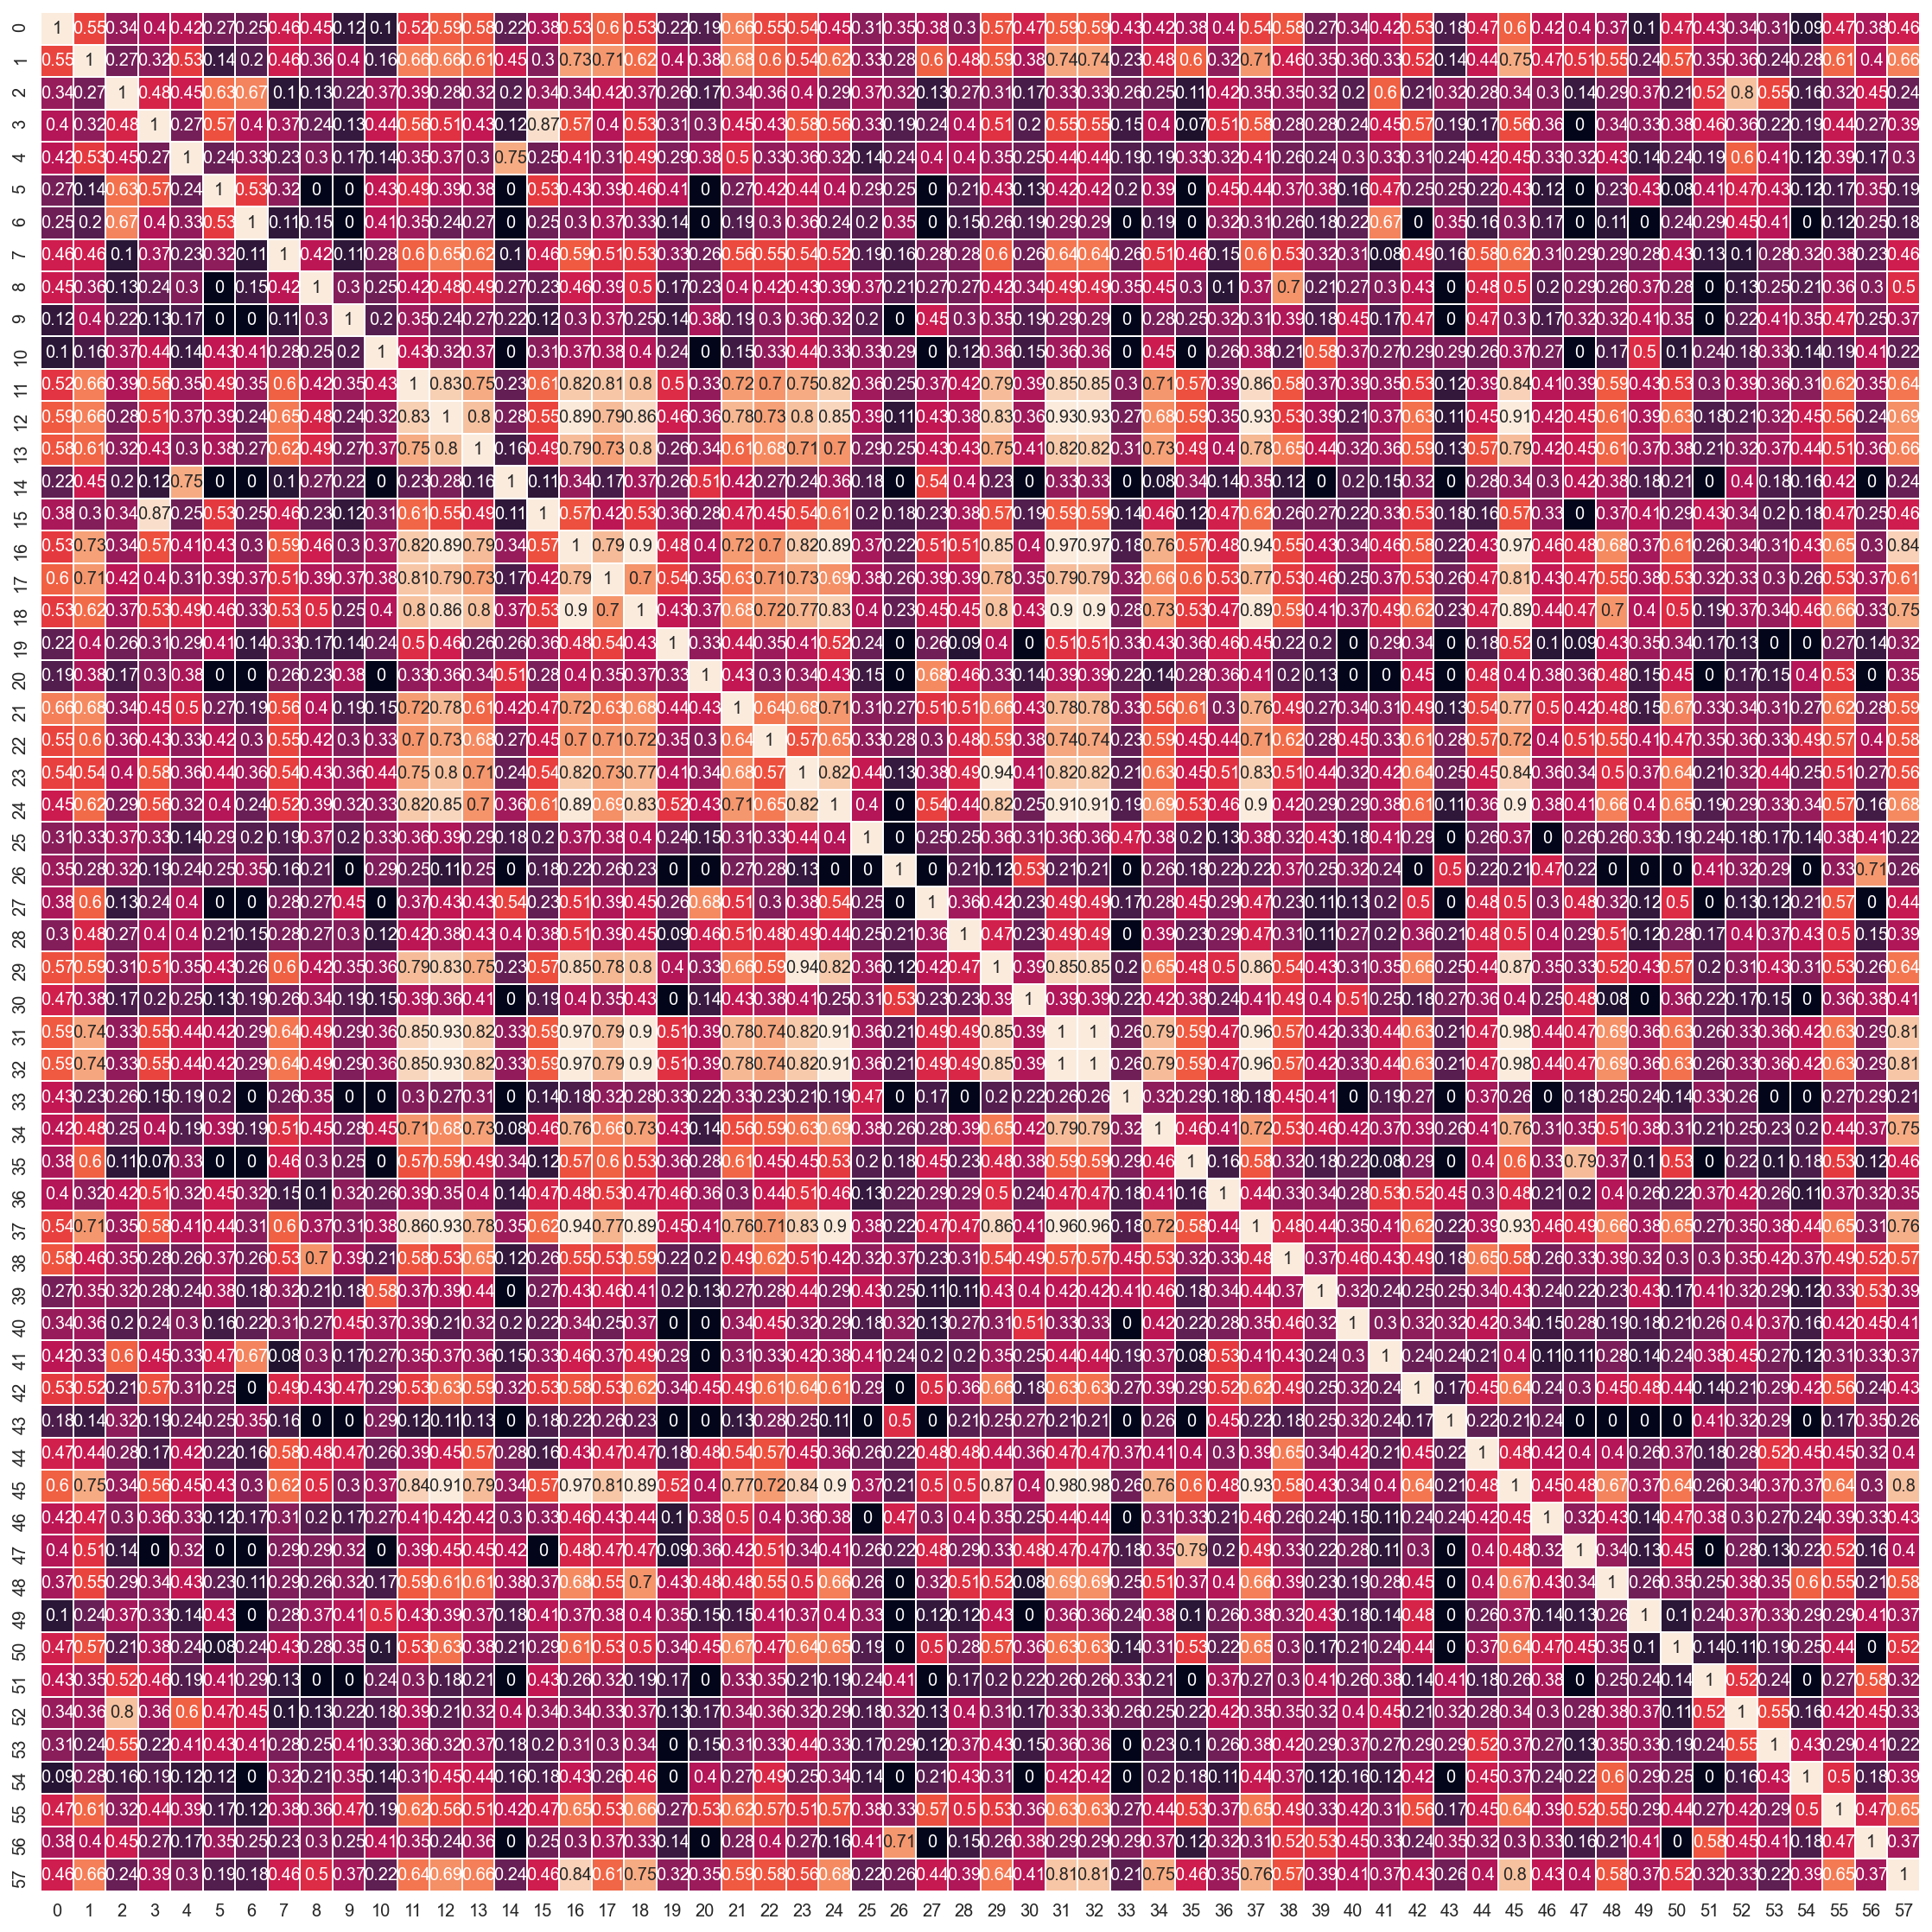

In [33]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = False
plt.figure(figsize=(30,20))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin=0,vmax=.9, square=True, annot=True, cbar=False,  linewidths=.2)
    plt.show()

In [34]:
item_item_matrix1 = item_item_matrix1.dropna()

In [35]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [36]:
links['value'] = links.value.apply( lambda x :  round(x,2))
links.head(100)

item         related item  value
0        คอลลาเจน             คอลลาเจน   1.00
1        คอลลาเจน        Brownie อวกาศ   0.55
2        คอลลาเจน               แม่โขง   0.34
3        คอลลาเจน                Botox   0.40
4        คอลลาเจน                กัญชา   0.42
..            ...                  ...    ...
95  Brownie อวกาศ           ไฟอัจฉริยะ   0.71
96  Brownie อวกาศ  บัตตาเลี่ยนที่ตัดผม   0.46
97  Brownie อวกาศ     ไดร์เป่าผม Dyson   0.35
98  Brownie อวกาศ            แผ่นเสียง   0.36
99  Brownie อวกาศ      กรรไกรตัดขนจมูก   0.33

[100 rows x 3 columns]

In [37]:
links= links.loc[(links['item'] !=links['related item'])].sort_values('value',ascending = False)
links_filtered=links.loc[(links['item'] != links['related item'])& (links['value'] > 0.75)]
links_filtered.shape

(172, 3)

In [38]:
links_filtered.sort_values(by = ['value'], ascending = False).head(10)

item related item  value
1830       ชาบู    Surfskate   1.00
1887  Surfskate         ชาบู   1.00
2642    กะปิดอง    Surfskate   0.98
2641    กะปิดอง         ชาบู   0.98
1901  Surfskate      กะปิดอง   0.98
1843       ชาบู      กะปิดอง   0.98
1814       ชาบู         Lego   0.97
960        Lego    Surfskate   0.97
959        Lego         ชาบู   0.97
973        Lego      กะปิดอง   0.97

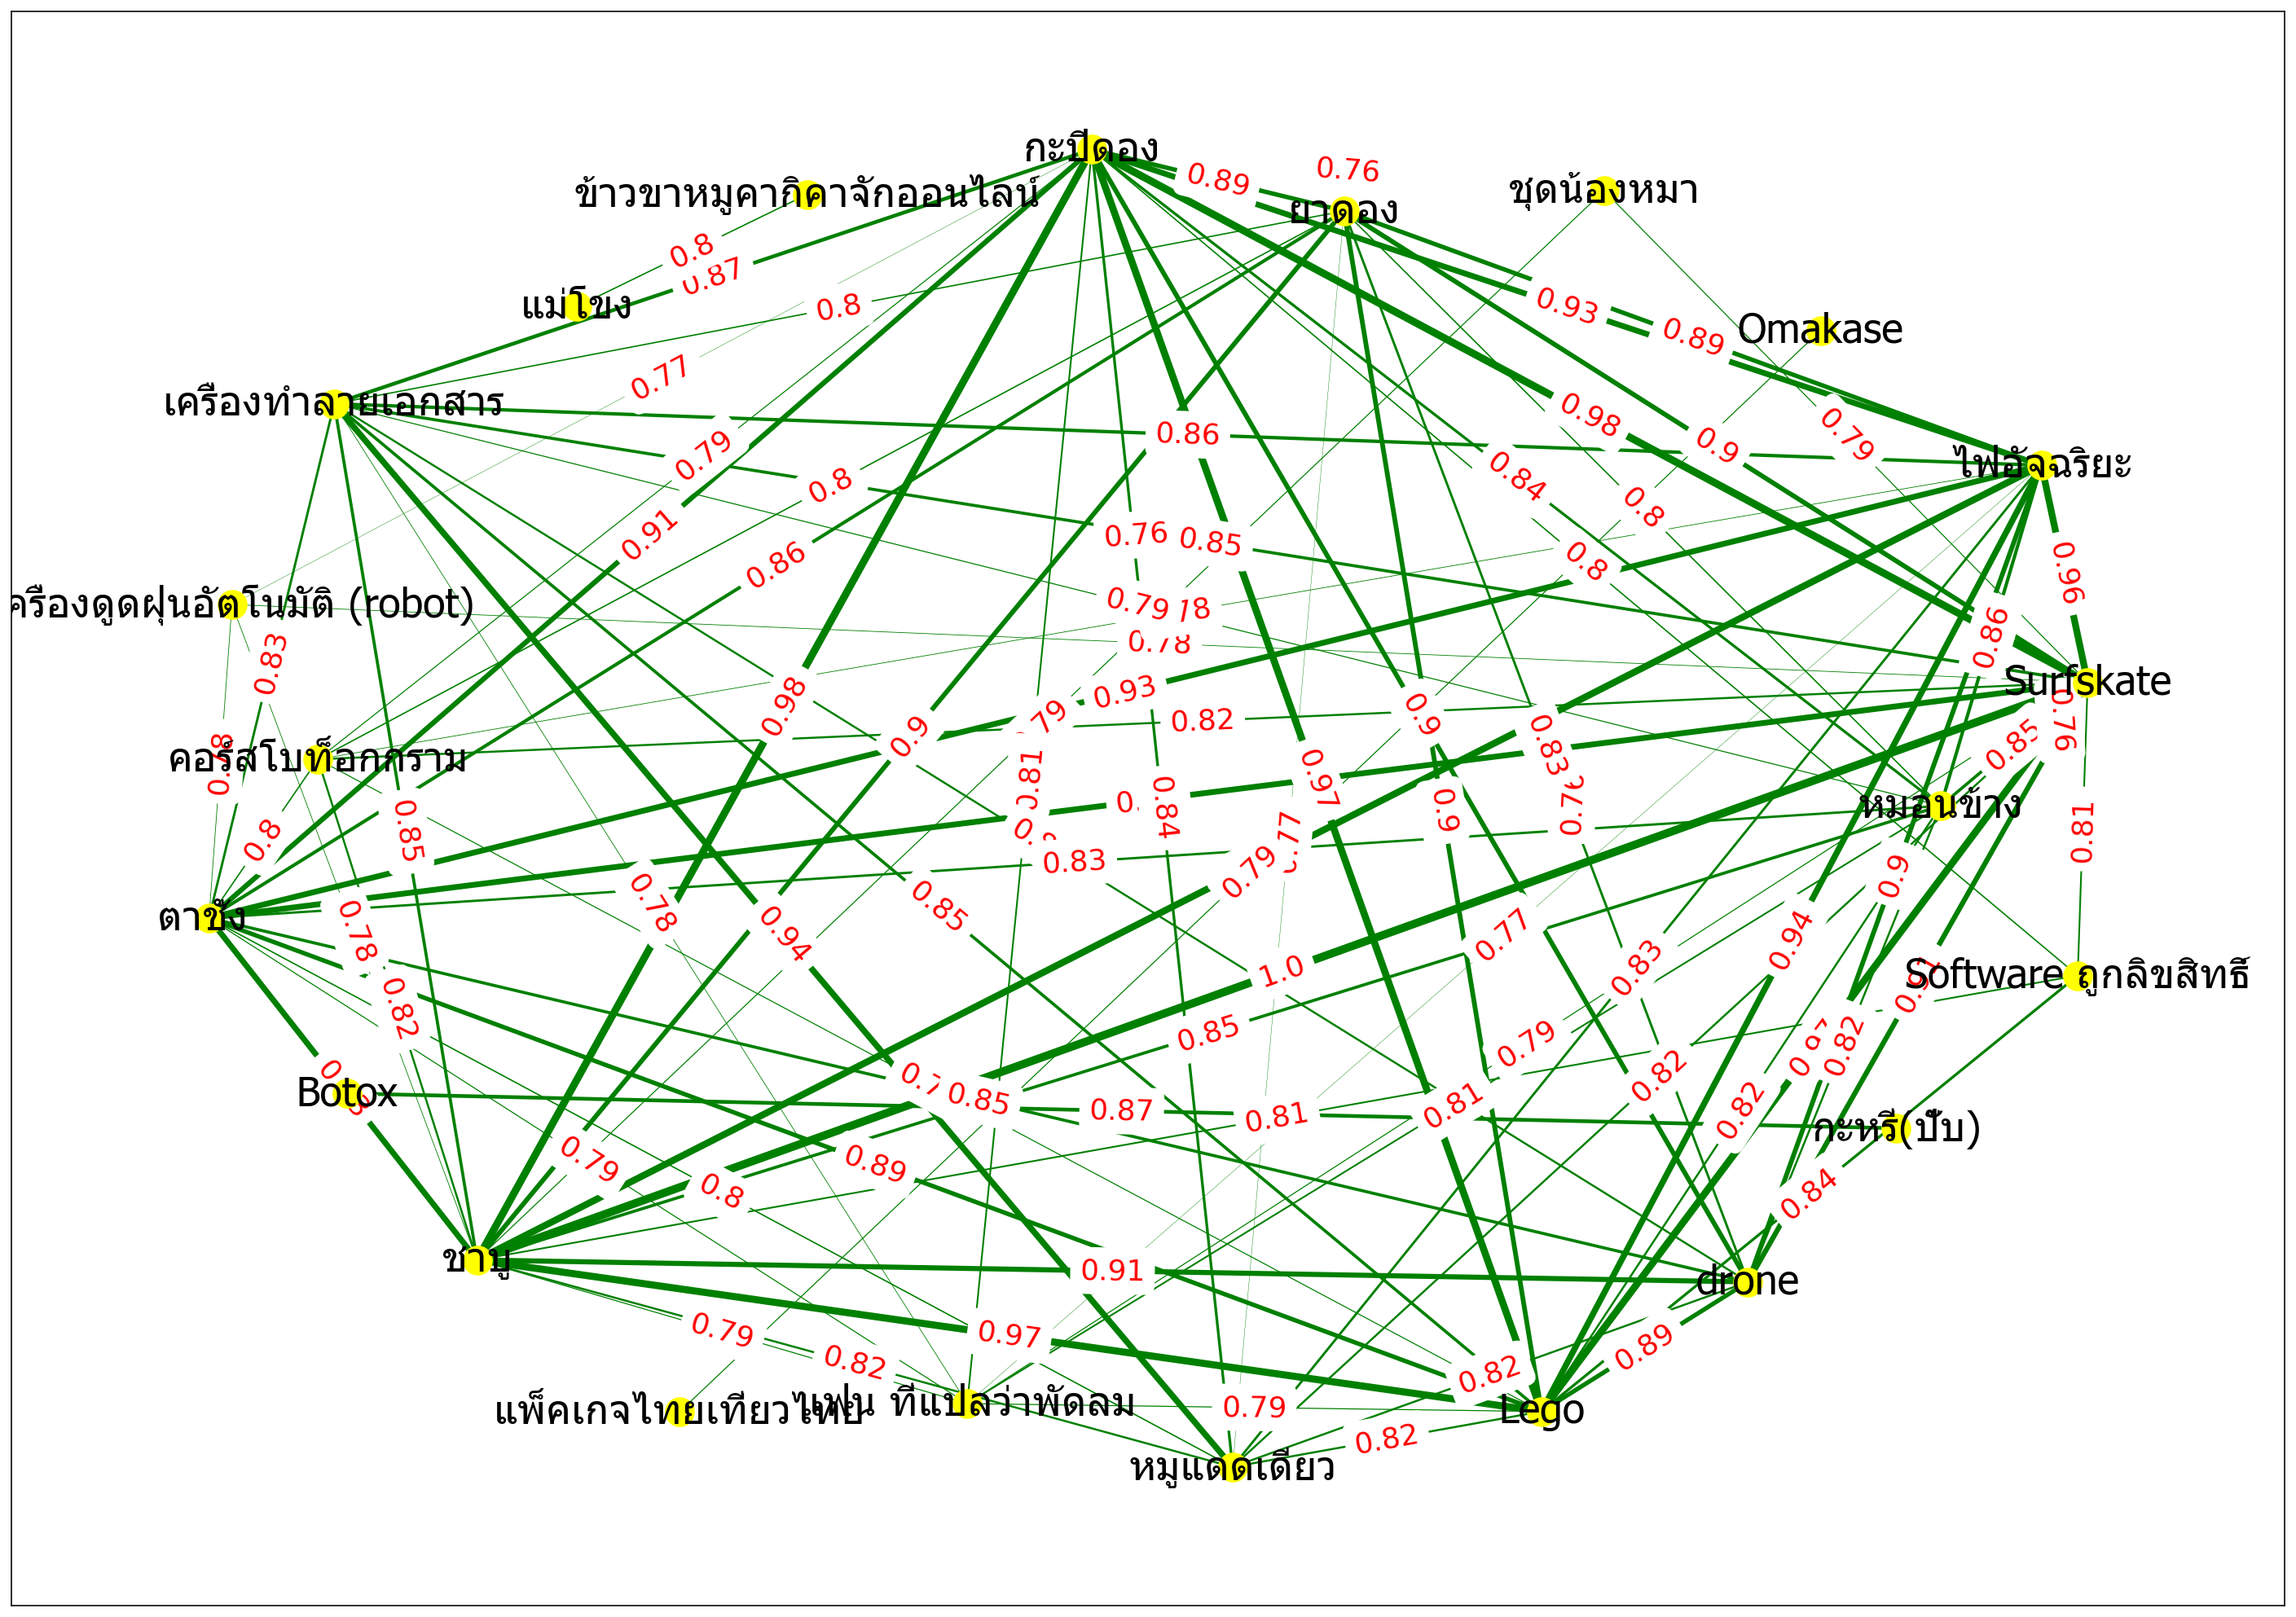

In [39]:
fig, ax = plt.subplots(figsize=(25,18))

GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item',edge_attr=['value'])

weight2 = [ float(i['value']) for i in dict(GA.edges).values()] 
weight2 = ((np.array(weight2)- min(weight2))/(max(weight2)-min(weight2)))*5
labels2 = [i for i in dict(GA.nodes)]
labels2 = {i:i for i in dict(GA.nodes).keys()}

pos = nx.spring_layout(GA,weight='weight2',  k=12)
nx.draw_networkx_nodes(GA, pos,ax = ax,node_color = 'yellow') 
nx.draw_networkx_edges(GA, pos,edge_color='green',arrowsize=10, width=weight2, ax=ax ) 
edge_labels = nx.get_edge_attributes(GA, 'value')

nx.draw_networkx_edge_labels(GA, pos, edge_labels=edge_labels, font_color='red', font_size=18)
_ = nx.draw_networkx_labels(GA, pos, labels2, ax=ax, font_family='Tahoma', font_size=25)
plt.show()